In [1]:
from pImpactR.util import naff
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = [0]*4
X[0] = np.loadtxt('[Rob][offsety]no_insert')
X[1] = np.loadtxt('[Rob][offsety]with_insert')
X[2] = np.loadtxt('[Rob][offsetx]no_insert')
X[3] = np.loadtxt('[Rob][offsetx]with_insert')
for i in range(2):
    X[i] = X[i][:,3] + 1j*X[i][:,4]
for i in range(2,4):
    X[i] = X[i][:,1] + 1j*X[i][:,2]
legend = ['vertial_no_insert',
          'vertial_with_insert',
          'horizontal_no_insert',
          'horizontal_with_insert']

In [3]:
FFT = [0]*4
T = len(X[0])
T = np.arange(T)/float(T)
for i in range(4):
    FFT[i] = np.fft.fft(X[i])   

In [4]:
Tune = np.zeros(4)
Tune1 = np.zeros(4)
Amp = [0]*4
X1 = [0]*4
X2 = [0]*4
FFT1 = [0]*4
FFT2 = [0]*4
for i in range(4):
    Tune[i],Amp[i],X1[i] = naff(1,X[i])
    FFT1[i] = np.fft.fft(X1[i])
    Tune1[i],Amp[i],X2[i] = naff(1,X1[i])
    FFT2[i] = np.fft.fft(X2[i])

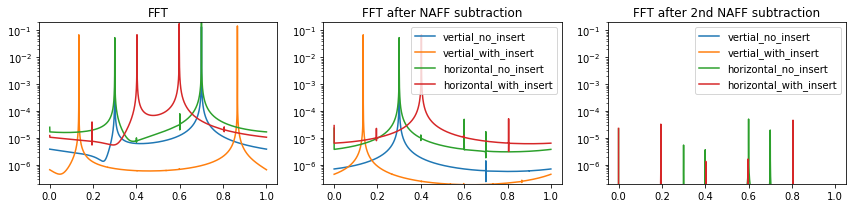

In [5]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
plt.title('FFT')
for i in range(4):
    plt.semilogy(T,np.abs(FFT[i]))
plt.ylim(2.0e-7,0.2);
plt.subplot(1,3,2)
plt.title('FFT after NAFF subtraction')
for i in range(4):
    plt.semilogy(T,np.abs(FFT1[i]))
plt.legend(legend)
plt.ylim(2.0e-7,0.2);
plt.subplot(1,3,3)
plt.title('FFT after 2nd NAFF subtraction')
for i in range(4):
    plt.semilogy(T,np.abs(FFT2[i]))
plt.legend(legend)
plt.ylim(2.0e-7,0.2);
plt.tight_layout()
plt.savefig('Rob.fft.data.png',dpi=90)

In [6]:
print(Tune)
print(1-Tune)

[0.70000369 0.86584387 0.69999414 0.59750148]
[0.29999631 0.13415613 0.30000586 0.40249852]


In [7]:
print(Tune1)
print(1-Tune1)

[0.29999631 0.13415613 0.30000586 0.40249852]
[0.70000369 0.86584387 0.69999414 0.59750148]


In [8]:
print(Tune1 - (1-Tune))

[-4.56255589e-11 -1.17132137e-11 -4.94215779e-13  9.15989340e-10]
